In [294]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importing Scilit Library
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso


#Importing STATModel Library
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# To display all the columns
pd.options.display.max_columns = None

# To display all the rows
pd.options.display.max_rows = None

In [295]:
# Ignoring Warnings
import warnings 
warnings.filterwarnings('ignore')

#### 1. Data Sourcing, cleaning and EDA

#### 1.1 Data Sourcing

In [296]:
# Importing data from CSV file
df = pd.read_csv('d:/train.csv')

#Printing first five rows
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [297]:
# checking the no.of rows and columns in dataframe
print(df.shape)

# describing the columns of dataframe
df.describe()

(1460, 81)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [298]:
#Checking column, its datatype and presences of NULL value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### 1.2 Data Cleaning and EDA

In [299]:
#Finding the NULL value percentage in columns
columns_nullvalue=(df.isnull().sum()/len(df))*100

#Displays the columns with percentage of NULL values
print(columns_nullvalue)

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

##### Considering 10% as my threshold and dropping the column having more then the threshold

In [300]:
#Filtering a columns more than 10% NULL value
round(df.isnull().sum()/len(df.index),2)[round(df.isnull().sum()/
                                                                 len(df.index),2).values>0.10]

LotFrontage    0.18
Alley          0.94
FireplaceQu    0.47
PoolQC         1.00
Fence          0.81
MiscFeature    0.96
dtype: float64

In [301]:
#Dropping a column with more than 10% value
df = df.drop(['LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature','MoSold'],axis='columns')

LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature','MoSold Column has been dropped

#### convert the Year columns with the age where we are going to fill these columns with number
Example: if max value is 2010 and year value is 2000 so, 2010 - 2000 = 10

In [302]:
df['YearBuilt_Old'] = df.YearBuilt.max()-df.YearBuilt
df['YearRemodAdd_Old'] = df.YearRemodAdd.max()-df.YearRemodAdd
df['GarageYrBlt_Old'] = df.GarageYrBlt.max()-df.GarageYrBlt
df['YrSold_Old'] = df.YrSold.max()-df.YrSold
df[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearBuilt_Old','YearRemodAdd_Old',
             'GarageYrBlt_Old','YrSold_Old']].sample(10)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
1021,2006,2006,2006.0,2006,4,4,4.0,4
1198,2001,2001,2001.0,2009,9,9,9.0,1
222,1975,1975,1975.0,2006,35,35,35.0,4
1167,2000,2000,2000.0,2006,10,10,10.0,4
900,1971,1971,1979.0,2007,39,39,31.0,3
418,1940,1950,1940.0,2007,70,60,70.0,3
1106,1990,1991,1990.0,2007,20,19,20.0,3
832,2003,2003,2003.0,2010,7,7,7.0,0
311,1948,2002,1948.0,2009,62,8,62.0,1
102,1979,1979,1979.0,2009,31,31,31.0,1


In [303]:
#Dropping actual columns
df = df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis='columns')

In [304]:
#Filling NULL values

df.MasVnrType.fillna('None',inplace=True)
df.MasVnrArea.fillna(df.MasVnrArea.mean(),inplace=True)
df.BsmtQual.fillna('TA',inplace=True)
df.BsmtCond.fillna('TA',inplace=True)
df.BsmtExposure.fillna('No',inplace=True)
df.BsmtFinType1.fillna('Unf',inplace=True)
df.BsmtFinType2.fillna('Unf',inplace=True)
df.GarageType.fillna('Attchd',inplace=True)
df.GarageFinish.fillna('Unf',inplace=True)
df.GarageQual.fillna('TA',inplace=True)
df.GarageCond.fillna('TA',inplace=True)
df.GarageYrBlt_Old.fillna(-1,inplace=True)
#Replacing GarageYrBlt_Old with -1 as these house donot have garage

In [305]:
#Dropping ID column as it only indexing a row
df = df.drop('Id',axis='columns')

Checking Street and Utilities values

In [306]:
print(df.Street.value_counts())
print(df.Utilities.value_counts())

Pave    1454
Grvl       6
Name: Street, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


In [307]:
#Dropping of steert and Utilities columns, as value present in is same with very fewer difference
df = df.drop(['Street','Utilities'],axis='columns')

In [308]:
# Checking for duplicate rows
df_copy = df
# dropping the duplicates in new dataframe
df_copy.drop_duplicates(inplace=True)
#Checking for difference
print(df.shape)
print(df_copy.shape)

(1460, 71)
(1460, 71)


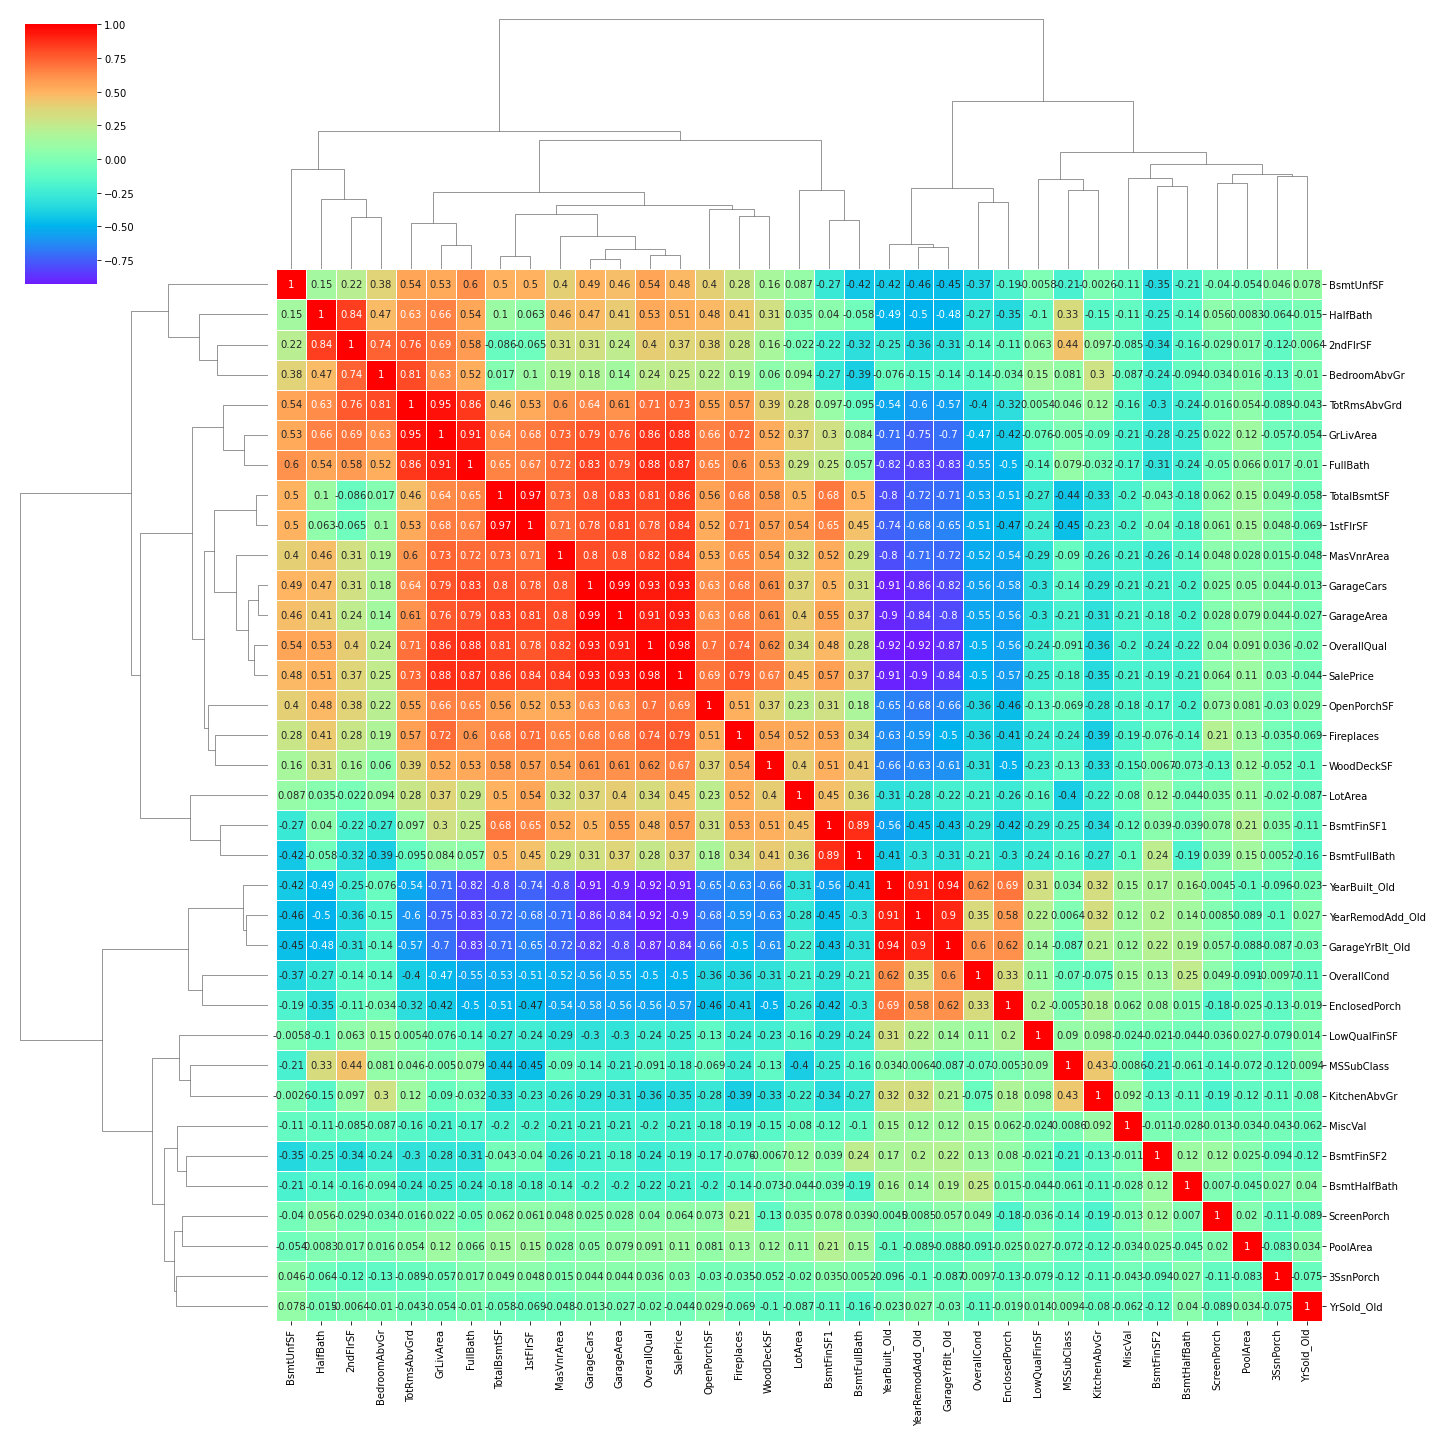

In [309]:
#Visualizing the correlation in the form of heat map.

kwargs = {'annot': True}
sns.clustermap(df[list(df.dtypes[df.dtypes!='object'].index)].corr().corr(), center = 0, cmap = 'rainbow', linewidths = 0.75, figsize = (20, 20), **kwargs)
plt.savefig('plotheatmap.png', dpi=300, bbox_inches='tight')
plt.show()

In [310]:
#Treating Outlier with lower and upper quantile as 0.25 & 0.99 respectively
num_col = list(df.dtypes[df.dtypes !='object'].index)
num_col = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','GrLivArea','OpenPorchSF',
           'EnclosedPorch','3SsnPorch',
           'ScreenPorch' ,'PoolArea','MiscVal','SalePrice']
def drop_outliers(x):
    list = []
    for col in num_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   
#Dropping the outlier
df = drop_outliers(df)

In [311]:
#Checking for reduction in number of rows
df.shape

(1441, 71)

In [312]:
#Performing decoding on required columns
#Checking columns which has object datatype
df[list(df.dtypes[df.dtypes=='object'].index)].head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [313]:
#Will check these columns for decode
df[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,Gtl,Gd,Gd,TA,No,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,Reg
1,Gtl,TA,Gd,TA,Gd,ALQ,Unf,Ex,Y,TA,RFn,TA,TA,TA,Reg
2,Gtl,Gd,Gd,TA,Mn,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1
3,Gtl,TA,TA,Gd,No,ALQ,Unf,Gd,Y,Gd,Unf,TA,TA,TA,IR1
4,Gtl,Gd,Gd,TA,Av,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1


In [314]:
#Performing Decoding
df['LandSlope'] = df.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
df['ExterQual'] = df.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['BsmtQual'] = df.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtCond'] = df.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtExposure'] = df.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
df['BsmtFinType1'] = df.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['BsmtFinType2'] = df.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['HeatingQC'] = df.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['CentralAir'] = df.CentralAir.map({'N':0,'Y':1})
df['KitchenQual'] = df.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['GarageFinish'] = df.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
df['GarageQual'] = df.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['GarageCond'] = df.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['ExterCond'] = df.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['LotShape'] = df.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

In [315]:
df[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,4,3,1,6,1,4,1,3,2,3,3,2,3
1,0,2,4,3,4,5,1,4,1,2,2,3,3,2,3
2,0,3,4,3,2,6,1,4,1,3,2,3,3,2,0
3,0,2,3,4,1,5,1,3,1,3,1,3,3,2,0
4,0,3,4,3,3,6,1,4,1,3,2,3,3,2,0


In [316]:
#One Hot Encoding to Encode categorical variable
dummy_col = pd.get_dummies(df[['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']],
                           drop_first=True)
df = pd.concat([df,dummy_col],axis='columns')
#Dropping actual columns
df = df.drop(['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition'],axis='columns')

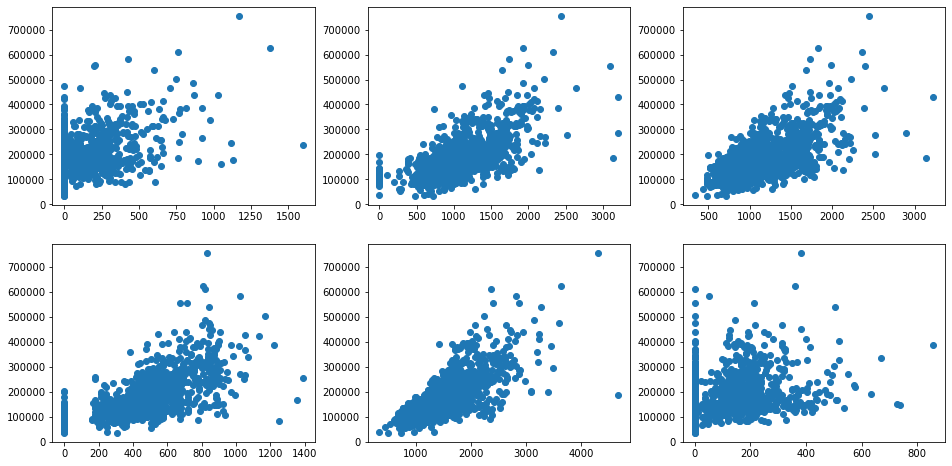

In [317]:
#Vistualizing Distribution of data
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(df.MasVnrArea,df.SalePrice)
plt.subplot(2,3,2)
plt.scatter(df.TotalBsmtSF,df.SalePrice)
plt.subplot(2,3,3)
plt.scatter(df['1stFlrSF'],df.SalePrice)
plt.subplot(2,3,4)
plt.scatter(df['GarageArea'],df.SalePrice)
plt.subplot(2,3,5)
plt.scatter(df['GrLivArea'],df.SalePrice)
plt.subplot(2,3,6)
plt.scatter(df['WoodDeckSF'],df.SalePrice)

#### 2.Preparing Data for Model Building

In [318]:
#Splitting train and test dataset
df_train,df_test = train_test_split(df,train_size=0.7,test_size=0.3,random_state=42)
#Checking the train and test dataset shape
print('Train set',df_train.shape)
print('Test set',df_test.shape)

Train set (1008, 193)
Test set (433, 193)


In [319]:
#Scaling a train data set since dependent and independent variable to be in particular range
num_col = ['MSSubClass','LotArea','OverallQual','OverallCond',
           'MasVnrArea','BsmtFinSF1',
           'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
           'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
           'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
           'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
           'ScreenPorch','PoolArea','MiscVal','SalePrice']

scaler = StandardScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_test[num_col] = scaler.transform(df_test[num_col])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

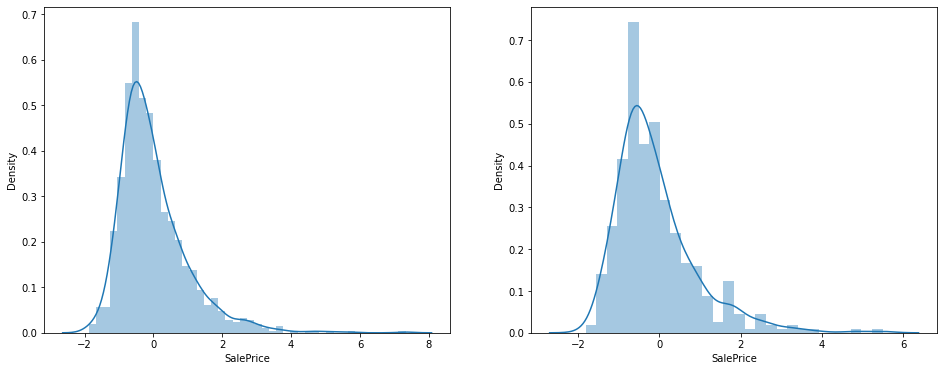

In [320]:
#Checking distribution of target variable after scaling
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(df_train.SalePrice)
plt.subplot(122)
sns.distplot(df_test.SalePrice)

In [321]:
#Removing target variable 
y_train = df_train.pop('SalePrice')
X_train = df_train
y_test = df_test.pop('SalePrice')
X_test = df_test

Using Recursive Feature Elimination method to eliminate least independent predictor variable for target

In [322]:
#Building a model
lm  = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [323]:
#Using RFE
rfe = RFE(lm,n_features_to_select=70)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=70)

In [324]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [325]:
#RFE selected columns
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)

In [326]:
#Filter the train and test set for the RFE selected columns
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

#### 3.Lasso Regression

In [327]:
#Lasso Model Building
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print('r2_score of train - ',r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print('r2_score of test - ',r2_score(y_true=y_test,y_pred=y_test_pred))

r2_score of train -  0.9104975771679272
r2_score of test -  0.8710319240921107


In [328]:
model_parameter = list(lm.coef_)
model_parameter.insert(0,lm.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = df_train.columns
col.insert(0,'Constant')
list(zip(col,model_parameter))

[('MSSubClass', -1.309),
 ('LotArea', 0.179),
 ('LotShape', 0.061),
 ('LandSlope', 0.099),
 ('OverallQual', 0.101),
 ('OverallCond', 0.074),
 ('MasVnrArea', 0.118),
 ('ExterQual', 0.032),
 ('ExterCond', -0.0),
 ('BsmtQual', 0.084),
 ('BsmtCond', 0.0),
 ('BsmtExposure', 0.081),
 ('BsmtFinType1', -0.006),
 ('BsmtFinSF1', 0.295),
 ('BsmtFinType2', -0.059),
 ('BsmtFinSF2', -0.066),
 ('BsmtUnfSF', 0.115),
 ('TotalBsmtSF', 0.076),
 ('HeatingQC', 0.086),
 ('CentralAir', 0.032),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.11),
 ('LowQualFinSF', -0.002),
 ('GrLivArea', -0.07),
 ('BsmtFullBath', 0.165),
 ('BsmtHalfBath', -0.0),
 ('FullBath', 0.0),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', 0.13),
 ('KitchenAbvGr', 0.242),
 ('KitchenQual', 0.308),
 ('TotRmsAbvGrd', 0.488),
 ('Fireplaces', 0.145),
 ('GarageFinish', 0.322),
 ('GarageCars', 0.087),
 ('GarageArea', -2.118),
 ('GarageQual', -0.186),
 ('GarageCond', -0.201),
 ('WoodDeckSF', 0.139),
 ('OpenPorchSF', -0.117),
 ('EnclosedPorch', -0.105),
 ('3SsnPorch'

In [329]:
#Improving our model with the optimal value of alpha
folds = KFold(n_splits=10,shuffle=True,random_state=42)
hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}
model = Lasso()
model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )
model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [330]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_l['param_alpha'].astype('float32')
cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.034032,0.006475,0.003477,0.002473,0.001,{'alpha': 0.001},0.845580,0.931317,0.835118,0.890718,0.924574,0.905173,0.918373,0.484961,0.905739,0.933288,0.857484,0.128269,1,0.914848,0.907458,0.917404,0.911951,0.908629,0.910498,0.908153,0.922061,0.910768,0.908786,0.912056,0.004466
1,0.007875,0.003699,0.002097,0.002385,0.010,{'alpha': 0.01},0.810558,0.882410,0.841516,0.843573,0.890404,0.870066,0.890653,0.398568,0.882566,0.924041,0.823435,0.144805,2,0.864022,0.854816,0.860162,0.857395,0.855279,0.855482,0.854531,0.889644,0.858209,0.853721,0.860326,0.010212
2,0.004058,0.004127,0.001129,0.001165,0.100,{'alpha': 0.1},0.741912,0.820299,0.775377,0.759602,0.818924,0.794388,0.822430,0.525062,0.839176,0.882154,0.777932,0.092694,3,0.801578,0.795929,0.793366,0.800900,0.795651,0.795937,0.789829,0.827002,0.796494,0.793102,0.798979,0.009906
3,0.001623,0.004869,0.004893,0.007049,1.000,{'alpha': 1.0},-0.006496,-0.021566,-0.018063,-0.001154,-0.000764,-0.003163,-0.007068,-0.037754,-0.004667,-0.014282,-0.011498,0.011066,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.004226,0.006565,0.000000,0.000000,5.000,{'alpha': 5.0},-0.006496,-0.021566,-0.018063,-0.001154,-0.000764,-0.003163,-0.007068,-0.037754,-0.004667,-0.014282,-0.011498,0.011066,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


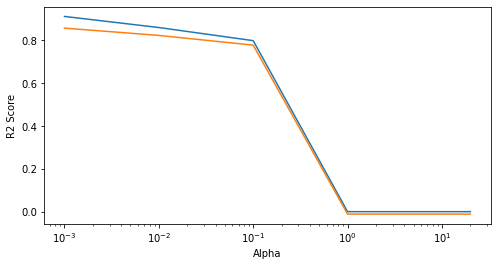

In [331]:
#Plotting Lasson model graph
plt.figure(figsize=(8,4))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [332]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.001}

In [333]:
#Rebuilding model
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print('r2_score of train - ',r2_score(y_true=y_train,y_pred=y_train_pred))
print('r2_score of test - ',r2_score(y_true=y_test,y_pred=y_test_pred))

r2_score of train -  0.9104975771679272
r2_score of test -  0.8710319240921107


In [334]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [335]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
48,YrSold_Old,1.414841
31,TotRmsAbvGrd,0.488415
33,GarageFinish,0.322274
30,KitchenQual,0.308046
13,BsmtFinSF1,0.294765
67,Neighborhood_Gilbert,0.276941
29,KitchenAbvGr,0.242185
49,MSZoning_FV,0.183681
60,Neighborhood_Blueste,0.181161
1,LotArea,0.178735


#### 4. Ridge Regression

In [336]:
#Building Ridge Regression Model
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print('r2_score of train - ',r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print('r2_score of test - ',r2_score(y_test,y_test_pred))

r2_score of train -  0.9159831213527418
r2_score of test -  0.8576554969767952


The above alpha value is not optimal for ridge there are sign of overfitting the clear difference we can see in the train and test score

In [337]:
#Improving our model with the optimal value of alpha
folds  = KFold(n_splits=10,shuffle=True,random_state=42)
hyper_param = {'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,20.0]}
model = Ridge()
model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)
model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [338]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.006302,0.002809,0.002671,0.002941,0.001,{'alpha': 0.001},0.842896,0.928921,0.790092,0.894818,0.924341,0.909503,0.926038,0.568934,0.905409,0.929047,0.862000,0.106584,7,0.920216,0.913549,0.924308,0.917717,0.914376,0.915850,0.913291,0.927235,0.916178,0.914283,0.917700,0.004539
1,0.006405,0.002380,0.004680,0.001609,0.010,{'alpha': 0.01},0.843377,0.928900,0.793075,0.894773,0.924354,0.909505,0.926030,0.568273,0.905531,0.929106,0.862292,0.106567,6,0.920215,0.913549,0.924304,0.917716,0.914375,0.915849,0.913290,0.927235,0.916177,0.914282,0.917699,0.004539
2,0.004686,0.003837,0.002899,0.003645,0.100,{'alpha': 0.1},0.846649,0.928676,0.817944,0.894352,0.924473,0.909513,0.925900,0.562109,0.906612,0.929638,0.864586,0.106932,5,0.920121,0.913474,0.923991,0.917646,0.914303,0.915774,0.913215,0.927205,0.916100,0.914207,0.917604,0.004513
3,0.006458,0.003367,0.004600,0.003357,0.200,{'alpha': 0.2},0.848517,0.928411,0.837659,0.893930,0.924575,0.909506,0.925695,0.556068,0.907576,0.930139,0.866208,0.107968,4,0.919903,0.913284,0.923268,0.917467,0.914119,0.915583,0.913025,0.927129,0.915904,0.914014,0.917370,0.004463
4,0.005787,0.001658,0.002895,0.002343,0.500,{'alpha': 0.5},0.850545,0.927540,0.869969,0.892863,0.924737,0.909489,0.924959,0.541565,0.909474,0.931272,0.868241,0.111776,3,0.918904,0.912336,0.920332,0.916567,0.913198,0.914644,0.912093,0.926750,0.914928,0.913063,0.916281,0.004364


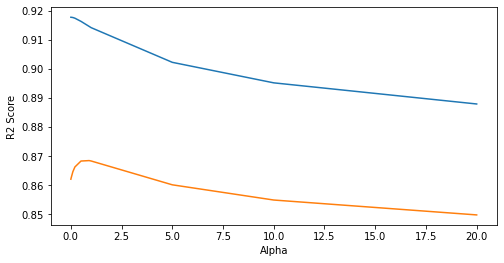

In [339]:
#Plotting ridge model graph
plt.figure(figsize=(8,4))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
# plt.xscale('log')
plt.ylabel('R2 Score')
plt.show()

In [340]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.9}

In [341]:
#Rebuilding a model
ridge = Ridge(alpha=0.9)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print('r2_score of train - ',r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print('r2_score of test - ',r2_score(y_test,y_test_pred))

r2_score of train -  0.9134853500635048
r2_score of test -  0.8669393140146785


In [342]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [343]:
#Co-efficients gained from ridge regression
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
48,YrSold_Old,1.411211
31,TotRmsAbvGrd,0.531342
33,GarageFinish,0.410671
67,Neighborhood_Gilbert,0.350670
30,KitchenQual,0.342842
29,KitchenAbvGr,0.283519
21,2ndFlrSF,0.272538
68,Neighborhood_IDOTRR,0.270794
44,MiscVal,0.243663
19,CentralAir,0.240006


After creating model in both Ridge and Lasso we can see that the r2_scores are almost same for both of them but Im selecting lasso as final model because it will penalize more on the dataset and can also help in feature elemination 

#### 5.Final Model

In [344]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print('r2_score of train - ',r2_score(y_true=y_train,y_pred=y_train_pred))
print('r2_score of test - ',r2_score(y_true=y_test,y_pred=y_test_pred))

r2_score of train -  0.9104975771679272
r2_score of test -  0.8710319240921107


<br>Best alpha value for Lasso : {'alpha': 0.001}
<br>Best alpha value for Ridge : {'alpha': 0.9}

In [345]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
48,YrSold_Old,1.414841
31,TotRmsAbvGrd,0.488415
33,GarageFinish,0.322274
30,KitchenQual,0.308046
13,BsmtFinSF1,0.294765
67,Neighborhood_Gilbert,0.276941
29,KitchenAbvGr,0.242185
49,MSZoning_FV,0.183681
60,Neighborhood_Blueste,0.181161
1,LotArea,0.178735


The Above variables are responsible for predicting sales price.